In [9]:
# https://analyticsindiamag.com/a-complete-guide-to-sequential-feature-selection/
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/H A R I H A R A N/Desktop/sem 8/Heart Disease/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
x=df.drop('target',axis=1)    
y=df['target']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state = 135)

In [11]:
# Sequential Forward Selection

import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors=9)

sfs1 = sfs(clf,
           k_features = 13,
           forward= True,
           floating= False,
           verbose= 2,
           scoring='accuracy',
           cv= 10)
sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s finished

[2023-02-21 20:31:11] Features: 1/13 -- score: 0.752[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2023-02-21 20:31:11] Features: 2/13 -- score: 0.7478333333333333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2023-02-21 20:31:12] Features: 3/13 -- score: 0.7933333333333332[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1

[13 11 12  2  1 10  9  3  4  6  7  5  8]


Text(0, 0.5, 'Performance')

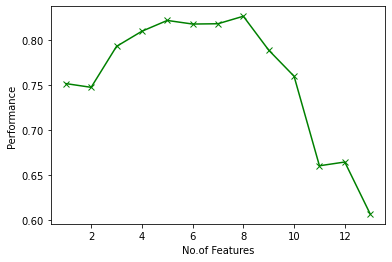

In [12]:
# Result 

import matplotlib.pyplot as plt
import seaborn as sns
data = sfs1.subsets_
res1 = []
a1 = np.arange(1,14)
for i in a1:
    e1 = data[i]['avg_score']
    res1.append(e1)
f1 = np.argsort(res1)
f1 = f1 + 1
print(f1)
plt.plot(a1,res1, color='green', marker='x', label='line with select markers')
plt.xlabel("No.of Features")
plt.ylabel("Performance")

In [6]:
data


{1: {'feature_idx': (2,),
  'cv_scores': array([0.84      , 0.68      , 0.79166667, 0.75      , 0.625     ,
         0.83333333, 0.79166667, 0.66666667, 0.83333333, 0.83333333]),
  'avg_score': 0.7645,
  'feature_names': ('cp',)},
 2: {'feature_idx': (1, 2),
  'cv_scores': array([0.84      , 0.68      , 0.79166667, 0.75      , 0.625     ,
         0.83333333, 0.79166667, 0.66666667, 0.83333333, 0.83333333]),
  'avg_score': 0.7645,
  'feature_names': ('sex', 'cp')},
 3: {'feature_idx': (1, 2, 12),
  'cv_scores': array([0.92      , 0.68      , 0.91666667, 0.70833333, 0.66666667,
         0.83333333, 0.75      , 0.79166667, 0.875     , 0.75      ]),
  'avg_score': 0.7891666666666667,
  'feature_names': ('sex', 'cp', 'thal')},
 4: {'feature_idx': (1, 2, 11, 12),
  'cv_scores': array([0.88      , 0.72      , 0.83333333, 0.75      , 0.75      ,
         0.91666667, 0.79166667, 0.83333333, 0.875     , 0.875     ]),
  'avg_score': 0.8225,
  'feature_names': ('sex', 'cp', 'ca', 'thal')},
 5: {'

In [13]:
newdf = df[['age',
   'sex',
   'cp',
   'fbs',
   'exang',
   'slope',
   'ca',
   'thal', 'target']]

In [24]:
x=newdf.drop('target',axis=1)    
y=newdf['target']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state = 135)

In [25]:
rf_Model = KNeighborsClassifier(n_neighbors=9)
model = rf_Model.fit(x_train,y_train)
print (model.score(x_test,y_test)*100)

75.40983606557377


In [26]:
# SBE

x=df.drop('target',axis=1)    
y=df['target']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state = 135)

In [27]:
clf = KNeighborsClassifier(n_neighbors=9)
sfs1 = sfs(clf,
           k_features = 1,
           forward= False,
           floating= False,
           verbose= 2,
           scoring='accuracy',
           cv= 10)
sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s finished

[2023-02-21 20:33:50] Features: 12/1 -- score: 0.6648333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2023-02-21 20:33:50] Features: 11/1 -- score: 0.6898333333333333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2023-02-21 20:33:50] Features: 10/1 -- score: 0.7563333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[13 12 11  2  1 10  9  3  4  6  7  5  8]


Text(0, 0.5, 'Performance')

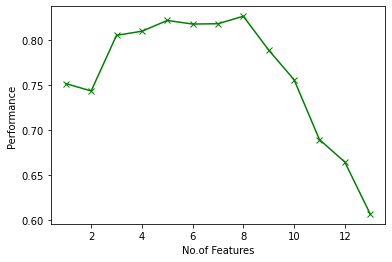

In [28]:
# Result 

import matplotlib.pyplot as plt
import seaborn as sns
data = sfs1.subsets_
res1 = []
a1 = np.arange(1,14)
for i in a1:
    e1 = data[i]['avg_score']
    res1.append(e1)
f1 = np.argsort(res1)
f1 = f1 + 1
print(f1)
plt.plot(a1,res1, color='green', marker='x', label='line with select markers')
plt.xlabel("No.of Features")
plt.ylabel("Performance")

In [21]:
data

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.92      , 0.76      , 0.91666667, 0.70833333, 0.625     ,
         0.875     , 0.75      , 0.75      , 0.83333333, 0.83333333]),
  'avg_score': 0.7971666666666666,
  'feature_names': ('age',
   'sex',
   'cp',
   'trestbps',
   'chol',
   'fbs',
   'restecg',
   'thalach',
   'exang',
   'oldpeak',
   'slope',
   'ca',
   'thal')},
 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12),
  'cv_scores': array([0.88      , 0.72      , 0.91666667, 0.79166667, 0.625     ,
         0.95833333, 0.75      , 0.79166667, 0.83333333, 0.91666667]),
  'avg_score': 0.8183333333333334,
  'feature_names': ('age',
   'sex',
   'cp',
   'trestbps',
   'chol',
   'fbs',
   'restecg',
   'exang',
   'oldpeak',
   'slope',
   'ca',
   'thal')},
 11: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12),
  'cv_scores': array([0.96      , 0.76      , 0.83333333, 0.70833333, 0.66666667,
         1.        , 0.7916666

In [34]:
new = df[['age',
   'cp',
   'trestbps',
   'fbs',
   'restecg',
   'slope',
   'ca',
   'thal', 'target']]

In [43]:
x=new.drop('target',axis=1)    
y=new['target']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state = 65)

In [44]:
rf_Model = KNeighborsClassifier(n_neighbors=9) 
model = rf_Model.fit(x_train,y_train)
print (model.score(x_test,y_test)*100)

67.21311475409836


In [42]:
# BDE
x=df.drop('target',axis=1)    
y=df['target']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state = 100)

In [43]:
clf = from sklearn.neighbors import KNeighborsClassifier
sfs1 = sfs(clf,
           k_features = 13,
           forward= True,
           floating= True,
           verbose= 2,
           scoring='accuracy',
           cv= 10)
sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   15.9s finished

[2023-02-20 20:55:10] Features: 1/13 -- score: 0.74[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   11.2s finished

[2023-02-20 20:55:21] Features: 2/13 -- score: 0.7605[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   10.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   

[ 1  2  5  4  7  3  6  8 13 12  9 11 10]


Text(0, 0.5, 'Performance')

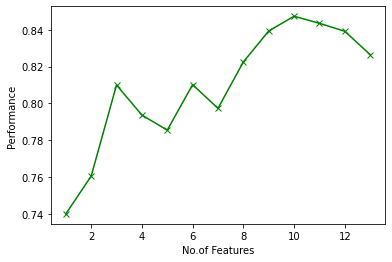

In [44]:
data = sfs1.subsets_
res1 = []
a1 = np.arange(1,14)
for i in a1:
    e1 = data[i]['avg_score']
    res1.append(e1)
f1 = np.argsort(res1)
f1 = f1 + 1
print(f1)
plt.plot(a1,res1, color='green', marker='x', label='line with select markers')
plt.xlabel("No.of Features")
plt.ylabel("Performance")

In [45]:
data

{1: {'feature_idx': (11,),
  'cv_scores': array([0.6       , 0.8       , 0.75      , 0.66666667, 0.79166667,
         0.75      , 0.83333333, 0.79166667, 0.75      , 0.66666667]),
  'avg_score': 0.74,
  'feature_names': ('ca',)},
 2: {'feature_idx': (11, 12),
  'cv_scores': array([0.72      , 0.76      , 0.70833333, 0.70833333, 0.83333333,
         0.70833333, 0.83333333, 0.75      , 0.83333333, 0.75      ]),
  'avg_score': 0.7605,
  'feature_names': ('ca', 'thal')},
 3: {'feature_idx': (8, 11, 12),
  'cv_scores': array([0.8       , 0.8       , 0.83333333, 0.83333333, 0.79166667,
         0.79166667, 0.91666667, 0.79166667, 0.83333333, 0.70833333]),
  'avg_score': 0.8099999999999999,
  'feature_names': ('exang', 'ca', 'thal')},
 4: {'feature_idx': (1, 8, 11, 12),
  'cv_scores': array([0.8       , 0.72      , 0.83333333, 0.83333333, 0.79166667,
         0.79166667, 0.91666667, 0.75      , 0.79166667, 0.70833333]),
  'avg_score': 0.7936666666666666,
  'feature_names': ('sex', 'exang', 'c

In [46]:
new = df[['age',
   'sex',
   'cp',
   'chol',
   'fbs',
   'restecg',
   'oldpeak',
   'slope',
   'ca',
   'thal','target']]

In [55]:
x=new.drop('target',axis=1)    
y=new['target']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state = 135)

In [56]:
rf_model = XGBClassifier()
model = rf_Model.fit(x_train,y_train)
print (model.score(x_test,y_test)*100)

88.52459016393442
